In [1]:
import pandas as pd
import json
import seaborn as sb

In [2]:
file_name = "DEBRV_DEHAM_historical_routes.csv"

In [3]:
raw_data = pd.read_csv(file_name)
raw_data.head()

,id,from_seq,to_seq,from_port,to_port,leg_duration,count,points
0,imo_9462794,127,128,DEBRV,DEHAM,36406308,135,"[[8.489074, 53.615707, 1509423228430, 14.0], [..."
1,imo_9454230,196,197,DEBRV,DEHAM,37389167,155,"[[8.48967, 53.614338, 1507290057531, 12.5], [8..."
2,imo_9454230,241,242,DEBRV,DEHAM,35623991,196,"[[8.499015, 53.60522, 1509682757817, 15.9], [8..."
3,imo_9372200,150,151,DEBRV,DEHAM,34345681,156,"[[8.495334, 53.609833, 1511932247447, 11.2], [..."
4,imo_9376048,116,117,DEHAM,DEBRV,32515761,189,"[[9.915167, 53.542168, 1508734759773, 7.6], [9..."


In [4]:
raw_data['id'] = raw_data['id'].astype(str)
raw_data['from_port'] = raw_data['from_port'].astype(str)
raw_data['to_port'] = raw_data['to_port'].astype(str)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            728 non-null    object
 1   from_seq      728 non-null    int64 
 2   to_seq        728 non-null    int64 
 3   from_port     728 non-null    object
 4   to_port       728 non-null    object
 5   leg_duration  728 non-null    int64 
 6   count         728 non-null    int64 
 7   points        728 non-null    object
dtypes: int64(4), object(4)
memory usage: 45.6+ KB


In [6]:
#Create a new frame from flatten points list

debrv_deham = raw_data[raw_data.from_port.str.contains("DEBRV")]

data_list = list()
for row in debrv_deham.itertuples(index=False):
    parsed_list = json.loads(row.points)
    for item in parsed_list:
        item.append(row.id)
    data_list += parsed_list

In [7]:

debrv_deham.head()

,id,from_seq,to_seq,from_port,to_port,leg_duration,count,points
0,imo_9462794,127,128,DEBRV,DEHAM,36406308,135,"[[8.489074, 53.615707, 1509423228430, 14.0], [..."
1,imo_9454230,196,197,DEBRV,DEHAM,37389167,155,"[[8.48967, 53.614338, 1507290057531, 12.5], [8..."
2,imo_9454230,241,242,DEBRV,DEHAM,35623991,196,"[[8.499015, 53.60522, 1509682757817, 15.9], [8..."
3,imo_9372200,150,151,DEBRV,DEHAM,34345681,156,"[[8.495334, 53.609833, 1511932247447, 11.2], [..."
6,imo_9297591,118,119,DEBRV,DEHAM,42196071,223,"[[8.488343, 53.61487, 1506326663060, 17.8], [8..."


In [8]:
df = pd.DataFrame(data_list, columns=['longitude', 'latitude', 'timestamp', 'speed', 'vessel_id'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81359 entries, 0 to 81358
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  81359 non-null  float64
 1   latitude   81359 non-null  float64
 2   timestamp  81359 non-null  int64  
 3   speed      81331 non-null  float64
 4   vessel_id  81359 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ MB


In [10]:
df.head()

,longitude,latitude,timestamp,speed,vessel_id
0,8.489074,53.615707,1509423228430,14.0,imo_9462794
1,8.476499,53.621193,1509423365984,14.8,imo_9462794
2,8.463407,53.626442,1509423498599,15.8,imo_9462794
3,8.450949,53.631893,1509423624892,15.6,imo_9462794
4,8.438425,53.637140,1509423750263,15.7,imo_9462794


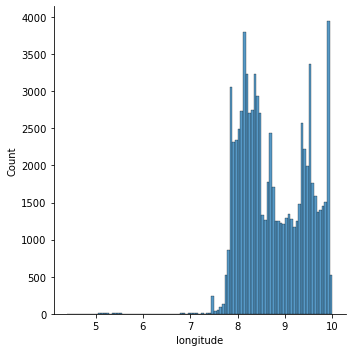

In [121]:
sb.displot(df['longitude'])

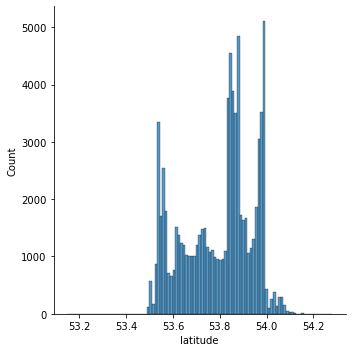

In [122]:
sb.displot(df['latitude'])

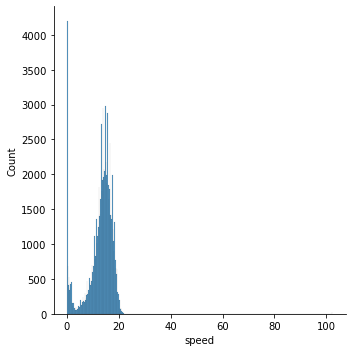

In [123]:
sb.displot(df['speed'])